In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=248bcbb00b23e3b6772c3915ced6f64f0a15a42ae5f3354ef8a2bf788af28ca8
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [ ]:
from pyforest import *

In [ ]:
df = pd.read_csv("/content/BankNote_Authentication.csv")
df

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df = pd.read_csv("/content/BankNote_Authentication.csv")
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
print(df.to_string)

<bound method DataFrame.to_string of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [ ]:
df.shape

(1372, 5)

In [ ]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [ ]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<IPython.core.display.Javascript object>

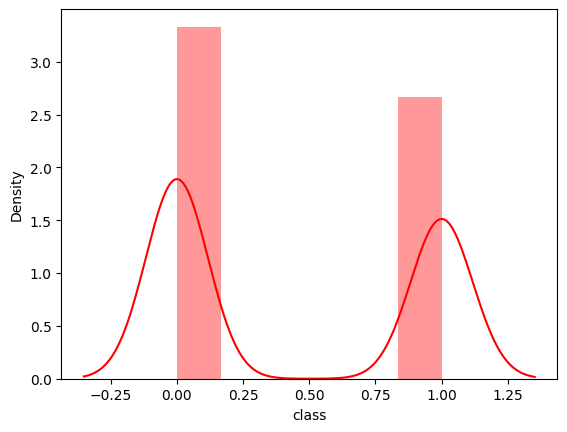

In [ ]:
sns.distplot(df['class'],color='red',kde=True);

<IPython.core.display.Javascript object>

<Axes: >

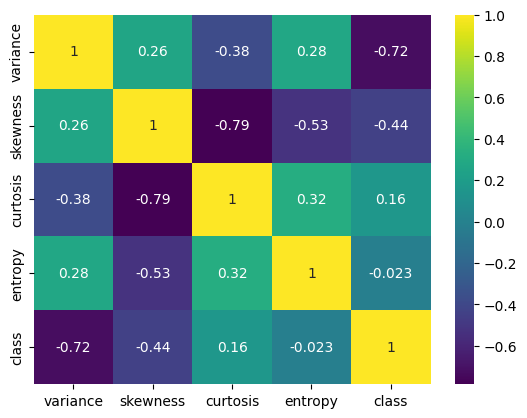

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

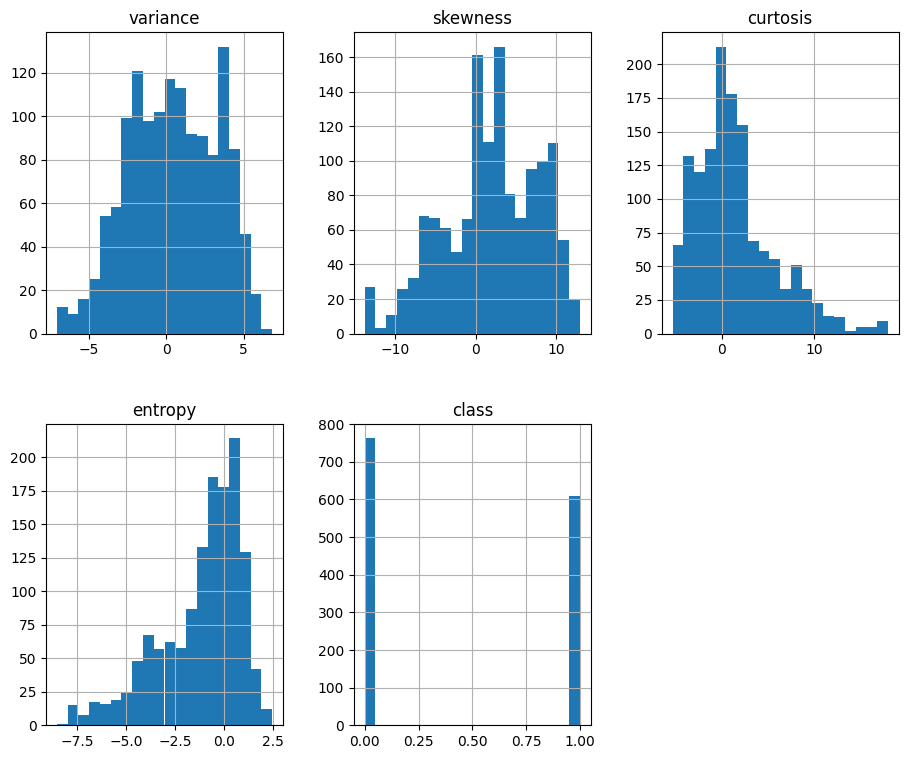

In [ ]:
df.hist(bins=20,figsize=(11,9),layout=(2,3));

<IPython.core.display.Javascript object>

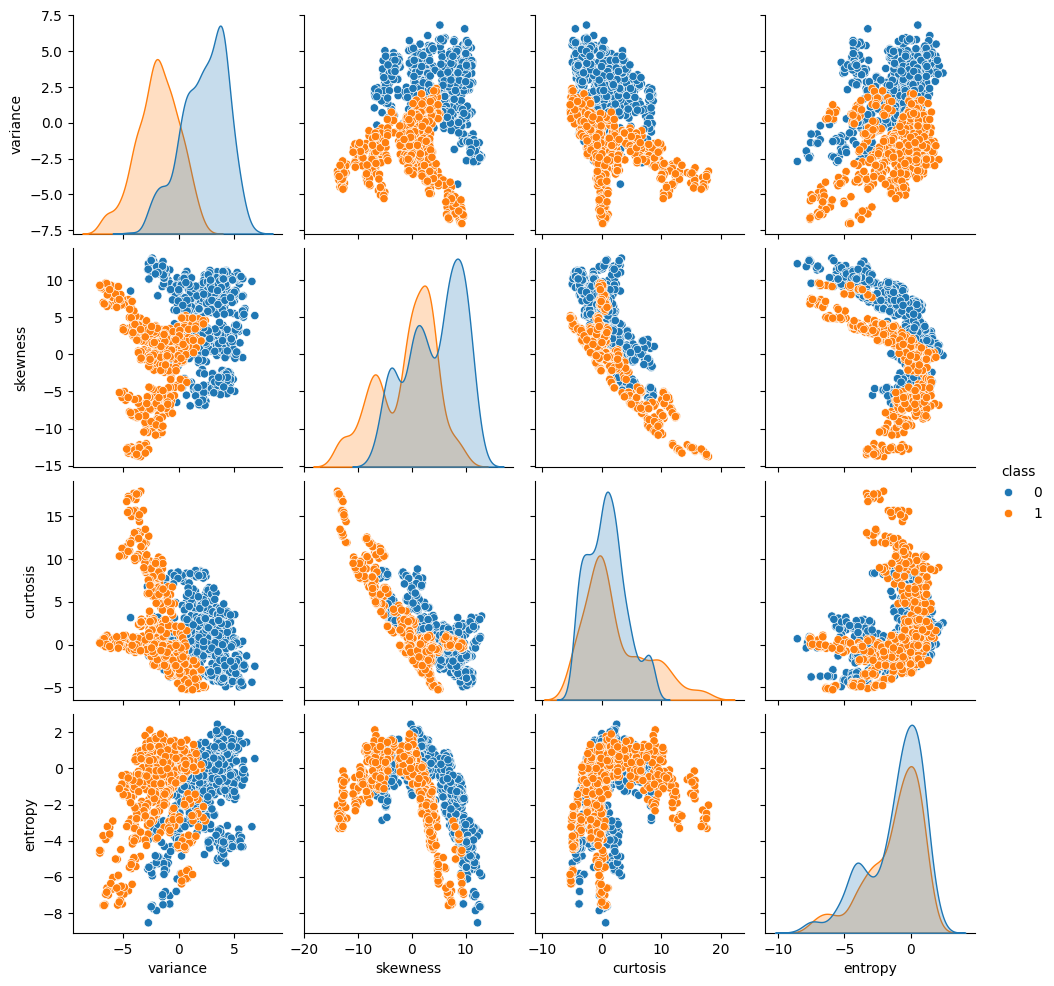

In [ ]:
sns.pairplot(df,hue='class');

DATA TO BUILD MODEL:

In [ ]:
X = df.drop('class',axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

SPLITTING DATA INTO TRAIN & TEST:

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
print("X_train:", X_train.shape)
print("X_test:" ,X_test.shape)
print("y_train:", y_train.shape)
print("y_test:",y_test.shape)

X_train: (1097, 4)
X_test: (275, 4)
y_train: (1097,)
y_test: (275,)


DATA PREPROCESSING:


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X=scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("X_train:\n", X_train)
print("\n")
print("X_test:\n", X_test)

X_train:
 [[-1.58438248  0.1072115  -0.14276339  0.03334576]
 [-1.08829139 -2.53123321  2.67783284 -0.35092979]
 [ 1.13672843 -0.15348755 -0.16820608  0.86368769]
 ...
 [-1.6900361   0.72314447 -0.19588896 -2.05114485]
 [ 0.57766241  0.02698182  0.1851622   0.52080477]
 [-0.9644631   0.30908695 -0.49734797 -0.03521515]]


X_test:
 [[-1.40564511 -0.03629527 -0.25946279 -0.55356298]
 [ 0.27456924  0.39719812  0.19050204  0.69982149]
 [-1.56677623 -1.70567084  2.36049857 -0.08188265]
 ...
 [ 0.33303672  0.90277959 -0.894603    0.10774845]
 [ 0.24291663 -0.00314587 -0.98169159  0.65423293]
 [ 0.44734548  0.89770987 -0.5083209  -0.56573811]]


1. LOGISTIC REGRESSION:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [ ]:
classifire = LogisticRegression(solver='liblinear',random_state=1)

classifire.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",accuracies)

Accuracies:
  [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [ ]:
print("Mean Accuracies: ",accuracies.mean())

Mean Accuracies:  0.9835863219349459


In [ ]:
classifire_pred = classifire.predict(X_test)
classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

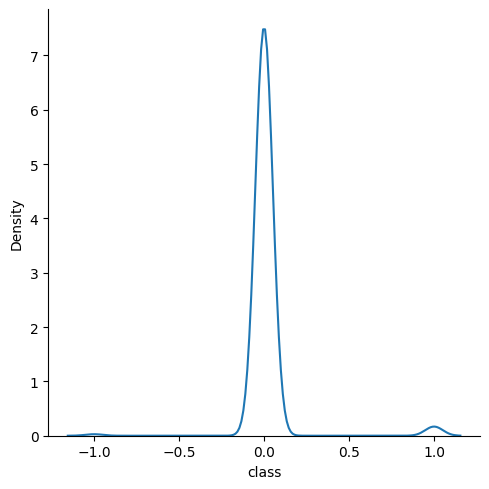

In [ ]:
sns.displot(classifire_pred-y_test, kind = 'kde')

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

precision = precision_score(y_test, classifire_pred)
recall = recall_score(y_test, classifire_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9512195121951219
Recall: 0.9915254237288136


In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the F1 score
f1 = f1_score(y_test,classifire_pred)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.970954356846473


In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, classifire_pred )

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.9915254237288136
Specificity (True Negative Rate): 0.9617834394904459


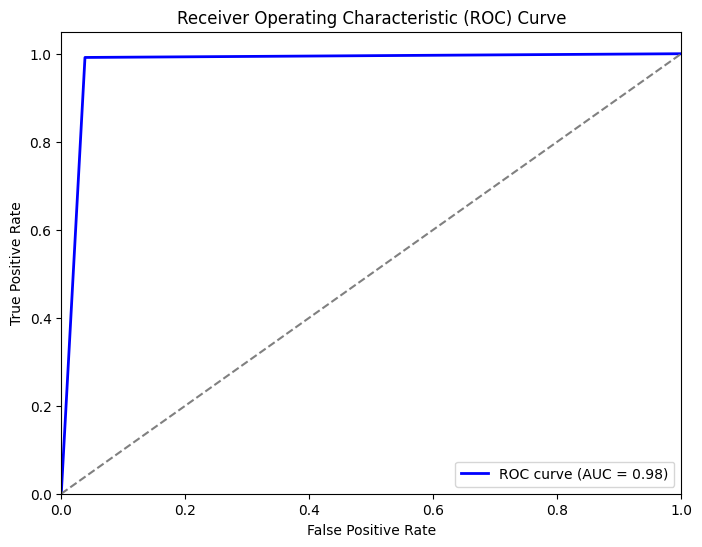

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,classifire_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


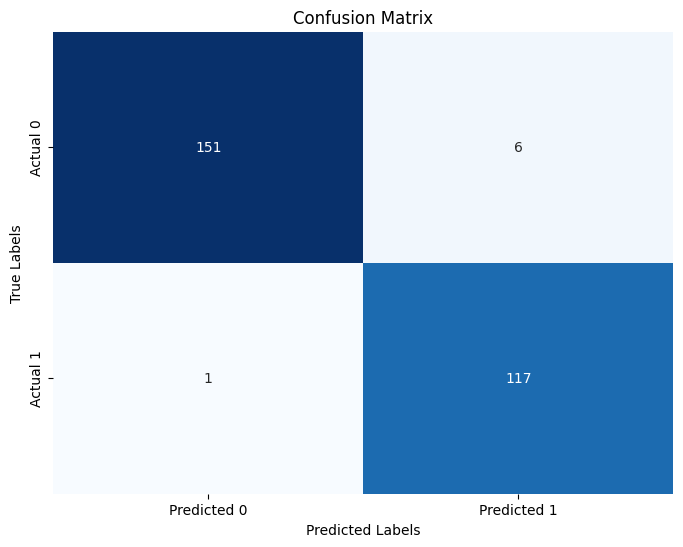

In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test,classifire_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


2.SUPPORT VECTOR MACHINE

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [ ]:
svm_classifire = SVC(kernel="linear")

svm_classifire.fit(X_train,y_train)

svm_accuracies = cross_val_score(estimator=svm_classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",svm_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [ ]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [ ]:
svm_classifire_pred = svm_classifire.predict(X_test)
svm_classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

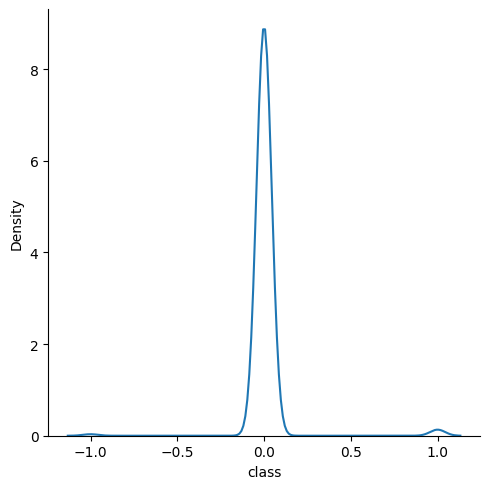

In [ ]:
sns.displot(svm_classifire_pred-y_test, kind = 'kde')

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

precision = precision_score(y_test, svm_classifire_pred)
recall = recall_score(y_test, svm_classifire_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9669421487603306
Recall: 0.9915254237288136


In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the F1 score
f1 = f1_score(y_test,svm_classifire_pred)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.9790794979079498


In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, svm_classifire_pred )

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Sensitivity (True Positive Rate): 0.9915254237288136
Specificity (True Negative Rate): 0.9745222929936306


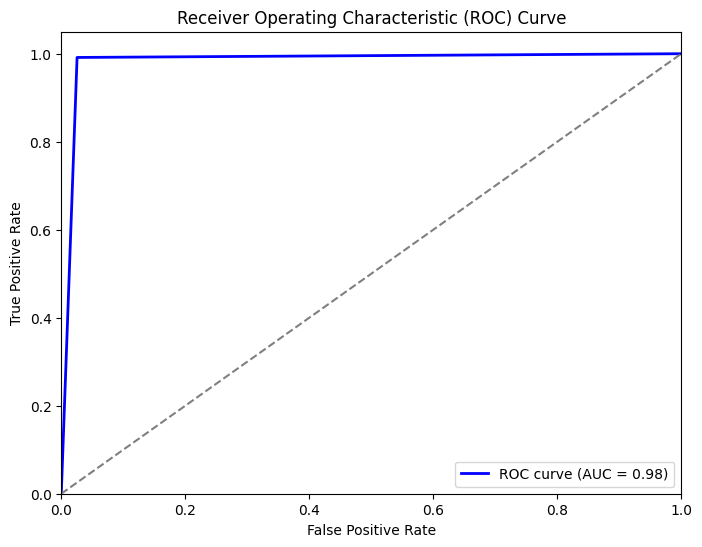

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,svm_classifire_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


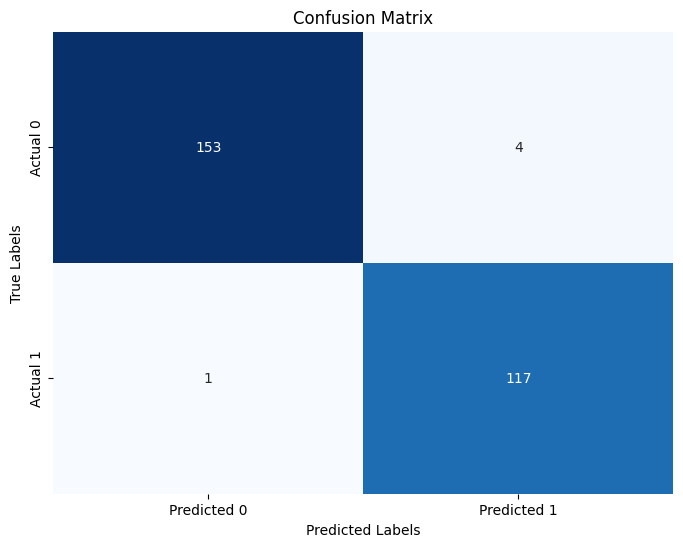

In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test,svm_classifire_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


3.RANDOM FOREST CLASSIFIER:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [ ]:
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)
rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator=rfc_classifier,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",rfc_accuracies)

Accuracies:
  [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [ ]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9927272727272728


In [ ]:
rfc_classifier_pred = rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

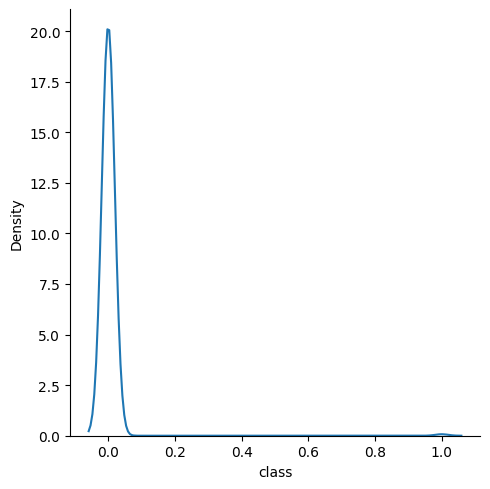

In [ ]:
sns.displot(rfc_classifier_pred-y_test, kind = 'kde')

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

precision = precision_score(y_test, rfc_classifier_pred)
recall = recall_score(y_test, rfc_classifier_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9915966386554622
Recall: 1.0


In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the F1 score
f1 = f1_score(y_test, rfc_classifier_pred)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.9957805907172996


In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rfc_classifier_pred )

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 0.9936305732484076


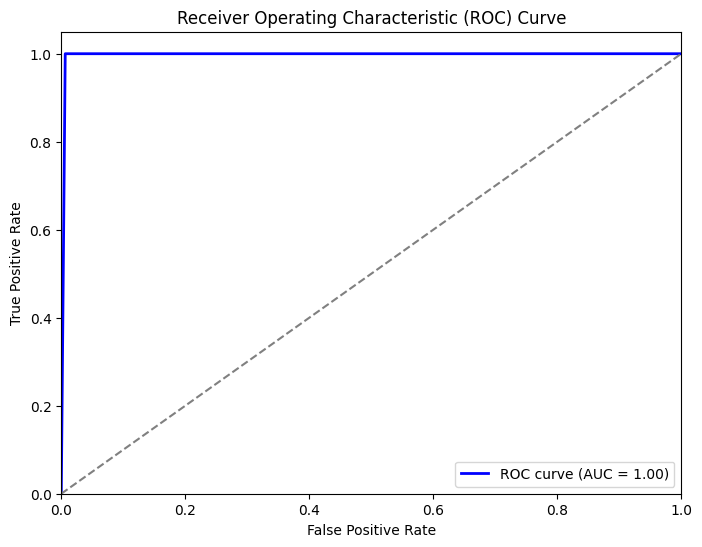

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,rfc_classifier_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


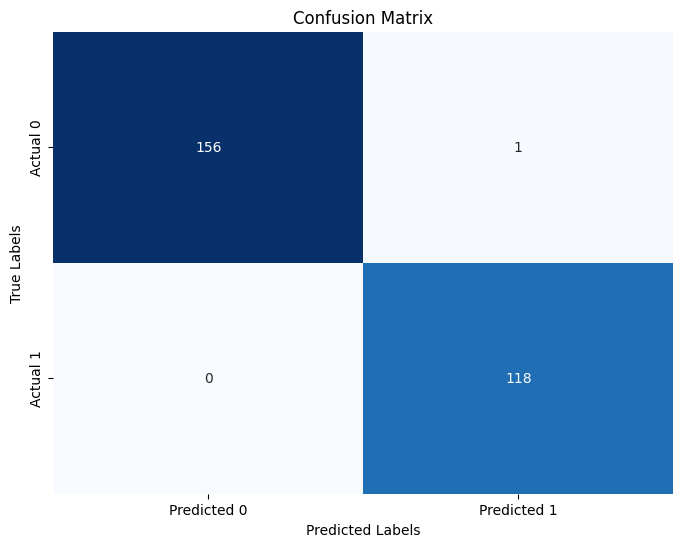

In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test,rfc_classifier_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


4.KNN CLASSIFER:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


In [ ]:
param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [ ]:
grid.best_params_


{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=2 ,p=1 ,leaf_size=2 )

In [ ]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [ ]:
KNN_pred = KNN.predict(X_test)

In [ ]:
knn_accuracies = cross_val_score(estimator=KNN,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",knn_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [ ]:
print("Mean Accuracy:",knn_accuracies.mean())

Mean Accuracy: 0.9972727272727273


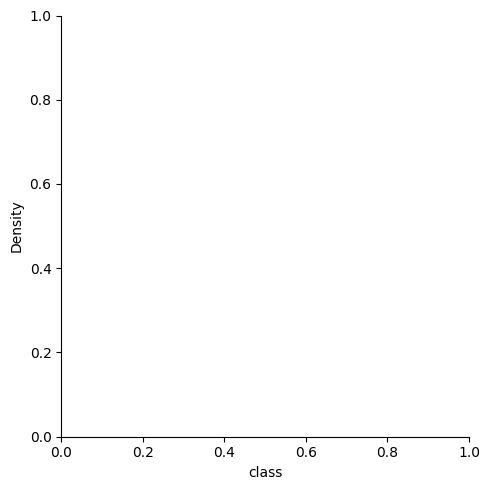

In [ ]:
sns.displot(KNN_pred-y_test,  kind = 'kde')

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

precision = precision_score(y_test, KNN_pred)
recall = recall_score(y_test, KNN_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 1.0
Recall: 1.0


In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the F1 score
f1 = f1_score(y_test, KNN_pred)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 1.0


In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, KNN_pred )

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 1.0


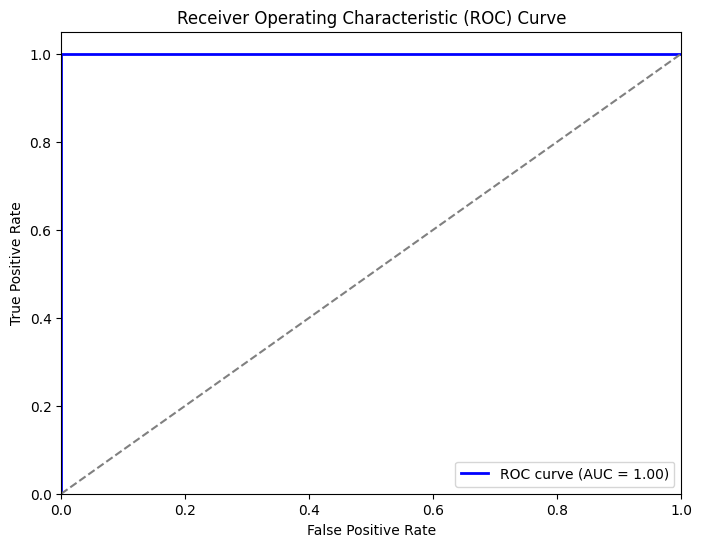

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, KNN_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


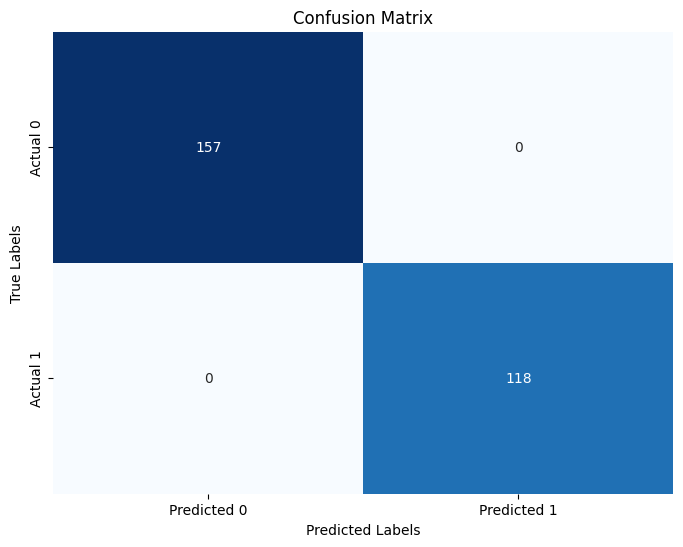

In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, KNN_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


5.XGBOOST

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [ ]:
xgb = XGBRegressor(n_estimators = 1000, learning_reta= 0.2, max_depth = 12, randome_state = 1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None,
             learning_reta=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([ 1.00010216e+00, -5.24475414e-04,  9.99919891e-01,  1.00014484e+00,
       -1.15613766e-05, -1.01095559e-02,  1.80613351e-05,  2.08847501e-04,
        6.02167602e-05, -8.63381138e-05, -5.79232001e-05,  1.00014484e+00,
       -1.73201170e-05,  9.49758410e-01,  9.99947548e-01, -8.32141377e-05,
        4.12536901e-05, -1.76507153e-03,  6.83533668e-04, -4.84433112e-04,
        9.99996006e-01, -5.77691790e-05, -1.78098783e-03,  1.00003314e+00,
        9.99698520e-01,  9.99919891e-01, -3.97171316e-05, -8.63381138e-05,
        9.99947548e-01, -5.77691790e-05, -3.08785493e-05, -1.16066272e-04,
        9.99910414e-01,  9.99839246e-01,  1.67748134e-04,  1.00003707e+00,
        9.99851942e-01,  3.80674773e-03,  9.99354959e-01, -9.21474420e-05,
        1.76761037e-04, -2.14258227e-02,  6.57830378e-06,  3.34239594e-05,
        9.89952803e-01,  9.99886394e-01, -1.41834389e-04, -5.38631284e-05,
       -1.51888264e-04,  9.99919891e-01,  7.19158471e-01, -1.52379042e-02,
        9.99947548e-01, -

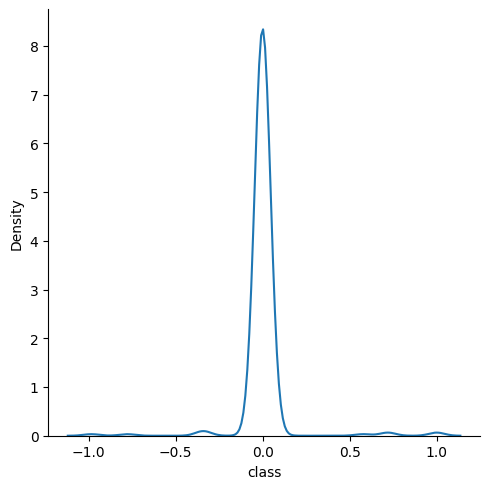

In [ ]:
sns.displot(y_pred_xgb-y_test, kind = 'kde')

In [ ]:
# Define a threshold value
threshold = 0.5

# Convert continuous predictions to binary predictions
y_pred_binary = np.where(y_pred_xgb >= threshold, 1, 0)

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Assuming you have your X_train and y_train datasets defined

# Create an XGBoost classifier
XGBoost_classifier = xgb.XGBClassifier()

# Compute cross-validated scores
XGBoost_accuracies = cross_val_score(estimator=XGBoost_classifier, X=X_train, y=y_train, cv=10)

# Print the cross-validated scores
print("Accuracies:\n", XGBoost_accuracies)


Accuracies:
 [0.99090909 1.         0.98181818 1.         0.99090909 1.
 0.99090909 1.         1.         1.        ]


In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Assuming you have your X and y datasets defined

# Create an XGBoost classifier (replace with regressor if it's a regression problem)
xgb_model = xgb.XGBClassifier()  # Example: XGBoost classifier

# Compute cross-validated scores
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validated scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


Cross-validated Accuracy Scores: [0.99636364 0.99272727 0.99270073 1.         0.99635036]
Mean Accuracy: 0.9956284007962839
Standard Deviation of Accuracy: 0.0027261872271652976


In [ ]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9586776859504132
Recall: 0.9830508474576272


In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_binary)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.9707112970711298


In [ ]:
# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Sensitivity (True Positive Rate): 0.9830508474576272
Specificity (True Negative Rate): 0.9681528662420382


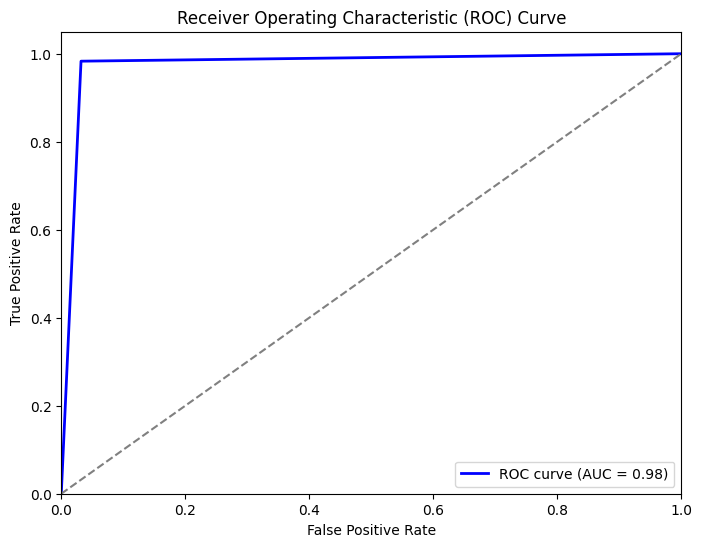

In [ ]:
# Assuming y_test and y_pred_xgb are already defined

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


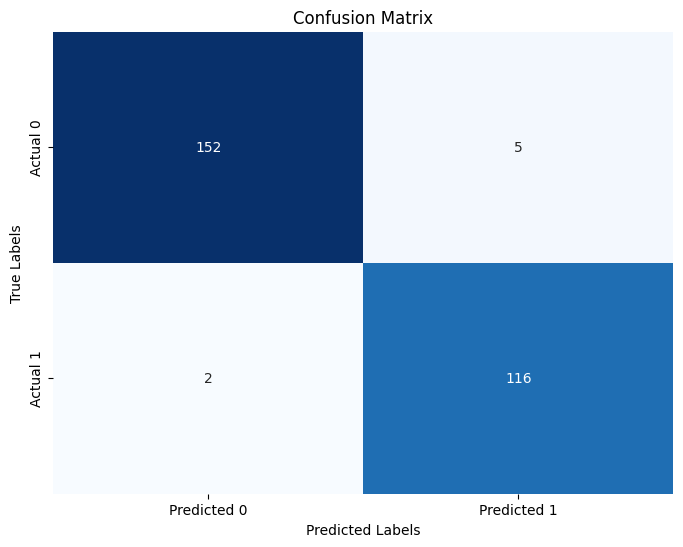

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


6.NAIVE BAYES:

In [ ]:
from sklearn.metrics import accuracy_score
NB_accuracy_score = accuracy_score(y_test, y_pred_NB)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
parameters = {
    'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

naive_bayes = GaussianNB()
NB_classifier = GridSearchCV(naive_bayes, parameters, cv=5, scoring = 'accuracy')
NB_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [ ]:
best_estimator = NB_classifier.best_estimator_
y_pred_NB = best_estimator.predict(X_test)
y_pred_NB

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

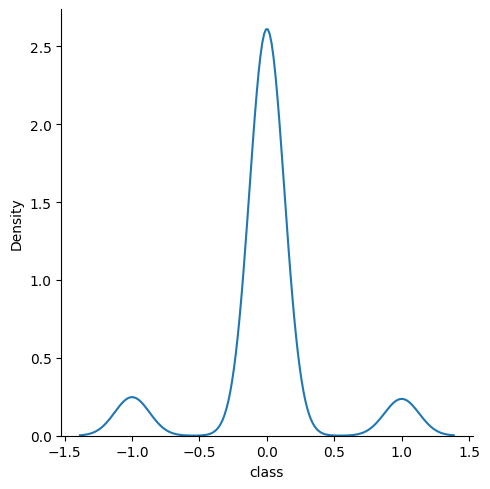

In [ ]:
import seaborn as sns
sns.displot(y_pred_NB-y_test, kind = 'kde')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Assuming you have your X_train and y_train datasets defined

# Create a Gaussian Naive Bayes classifier
NB_classifier = GaussianNB()

# Compute cross-validated scores
NB_accuracies = cross_val_score(estimator=nb_classifier, X=X_train, y=y_train, cv=10)

# Print the cross-validated scores
print("Accuracies:\n", NB_accuracies)


Accuracies:
 [0.85454545 0.86363636 0.85454545 0.85454545 0.83636364 0.76363636
 0.83636364 0.85321101 0.8440367  0.8440367 ]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Assuming you have your X and y datasets defined

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Compute cross-validated scores
cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validated scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


Cross-validated Accuracy Scores: [0.85818182 0.8        0.79927007 0.88321168 0.85036496]
Mean Accuracy: 0.8382057067020572
Standard Deviation of Accuracy: 0.03331092817723159


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test and y_pred_xgb are already defined

precision = precision_score(y_test, y_pred_NB)
recall = recall_score(y_test, y_pred_NB)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8205128205128205
Recall: 0.8135593220338984


In [ ]:
from sklearn.metrics import f1_score

# Assuming y_test and y_pred_xgb are already defined

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_NB)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.8170212765957446


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_binary are already defined

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_NB)

# Extract values from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print sensitivity and specificity
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Sensitivity (True Positive Rate): 0.8135593220338984
Specificity (True Negative Rate): 0.8662420382165605


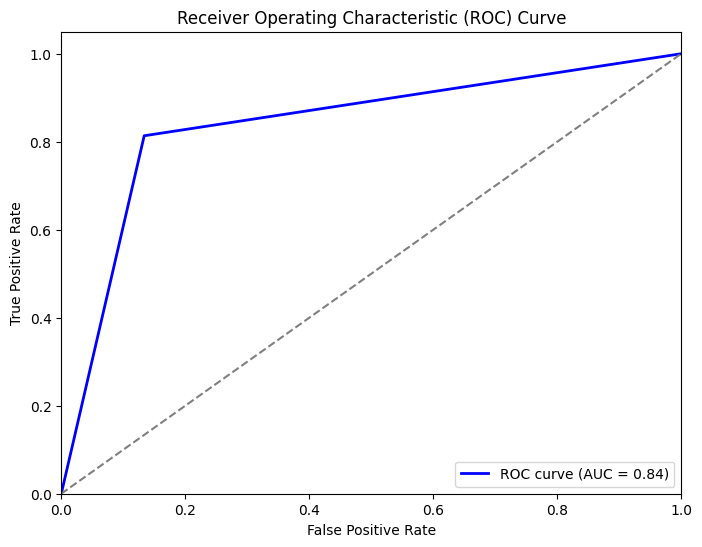

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_xgb are already defined

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_NB)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


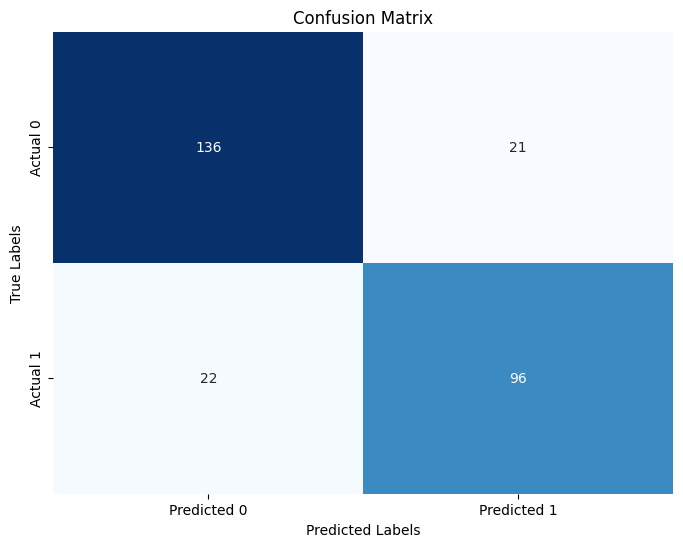

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_NB)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


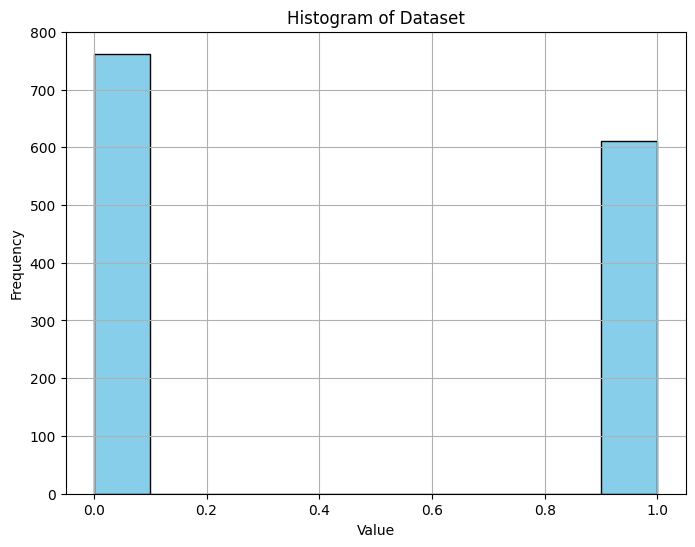

In [100]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dataset')
plt.grid(True)
plt.show()

In [ ]:
print("Mean of Cross Validation Score of LogisticRegression: {0:.4f}%".format(accuracies.mean()*100))
print("\n")
print("Mean of Cross Validation Score of Support Vector Machine: {0:.4f}%".format(svm_accuracies.mean()*100))
print("\n")
print("Mean of Cross Validation Score of Random Forest: {0:.4f}%".format(rfc_accuracies.mean()*100))
print("\n")
print("Mean of Cross Validation Score of KNN: {0:.4f}%".format(knn_accuracies.mean()*100))
print("\n")
print("Mean of Cross Validation Score of XGBoost: {0:.4f}%".format(XGBoost_accuracies.mean()*100))
print("\n")
print("Mean of Cross Validated Accuracy Scores of NAIVE BAYES: {0:.4f}%".format(NB_accuracies.mean()*100))
print("\n")
print("R2 Score of XGBoost:", r2_score(y_test, y_pred_xgb)*100,"%")
print("\n")
print("Accuracy Score of Naive Bayes:",NB_accuracy_score*100,"%")

Mean of Cross Validation Score of LogisticRegression: 98.3586%


Mean of Cross Validation Score of Support Vector Machine: 98.5405%


Mean of Cross Validation Score of Random Forest: 99.2727%


Mean of Cross Validation Score of KNN: 99.7273%


Mean of Cross Validation Score of XGBoost: 99.5455%


Mean of Cross Validated Accuracy Scores of NAIVE BAYES: 84.0492%


R2 Score of XGBoost: 92.11919220017599 %


Accuracy Score of Naive Bayes: 84.36363636363636 %
